In [1]:
! pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp312-cp312-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.7-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp312-cp312-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 2.8 MB/s eta 0:00:03
   --- ------------------------------------ 0.8/8.0 MB 2.8 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.0 MB 2.3 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
! pip install langdetect

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 932.9 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 882.6 kB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 882.6 kB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 811.6 kB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 894.7 kB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 865.2 kB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Importation des bibliothèques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
import nltk

# Télécharger les stopwords si ce n'est pas encore fait
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mounira Kitio
[nltk_data]     TRAORE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Chargement des données

In [3]:
# Charger le fichier CSV
file_path = '../data/tweets_marketing_raw.csv'  # Chemin du fichier
data = pd.read_csv(file_path)

# Aperçu des données
print(data.head())
print(f"Nombre de lignes et colonnes : {data.shape}")
print(data.info())


                        Date          Utilisateur  \
0  2024-12-21 14:02:47+00:00            408924361   
1  2024-12-21 14:02:46+00:00  1626922728296005641   
2  2024-12-21 14:02:45+00:00             12118772   
3  2024-12-21 14:02:45+00:00  1438356504948756480   
4  2024-12-21 14:02:45+00:00             12118772   

                                               Texte  Likes  Retweets  
0  @TheSavBananas @Vikings Imagine thinking you c...      0         0  
1  RT @funildombl: TCE-PE vê superfaturamento de ...      0         2  
2  Discover how our expertise in marketing techno...      0         0  
3  "Think of each piece of content as a brushstro...      0         0  
4  By using reliable tools that provide clear ins...      0         0  
Nombre de lignes et colonnes : (100, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         100 no

Convertir la colonne Date en type datetime

In [4]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Vérifier le résultat
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Date         100 non-null    datetime64[ns, UTC]
 1   Utilisateur  100 non-null    int64              
 2   Texte        100 non-null    object             
 3   Likes        100 non-null    int64              
 4   Retweets     100 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 4.0+ KB
None


Vérification des valeurs manquantes

In [5]:
print(data.isnull().sum())

Date           0
Utilisateur    0
Texte          0
Likes          0
Retweets       0
dtype: int64


 Vérifier les doublons

In [6]:
# Vérifier s'il y a des doublons
print(f"Nombre de doublons : {data.duplicated().sum()}")

# Supprimer les doublons
data = data.drop_duplicates()

# Vérifier les dimensions après suppression
print(f"Nouvelles dimensions des données : {data.shape}")

Nombre de doublons : 0
Nouvelles dimensions des données : (100, 5)


Visualisation de la distribution des longueurs des tweets

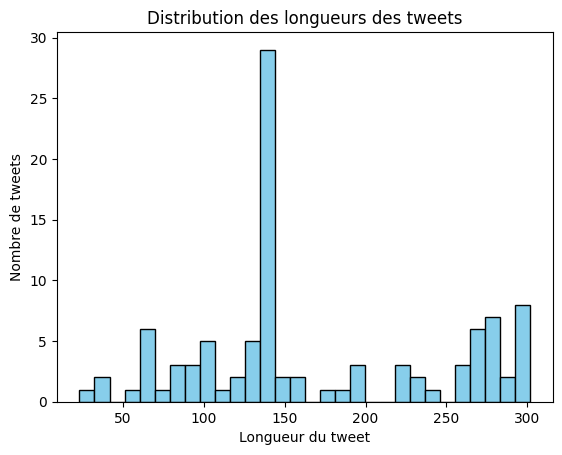

In [7]:
# Calculer la longueur des tweets
data['Tweet_Length'] = data['Texte'].astype(str).apply(len)

# Histogramme des longueurs des tweets
plt.hist(data['Tweet_Length'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution des longueurs des tweets")
plt.xlabel("Longueur du tweet")
plt.ylabel("Nombre de tweets")

# Enregistrer dans outputs
plt.savefig('../outputs/tweet_length_distribution.png')
plt.show()

**Interprétation**: Nous pouvons voir que la plupart des tweets ont enviiron 140 caractères 

Génération d'un nuage de mots

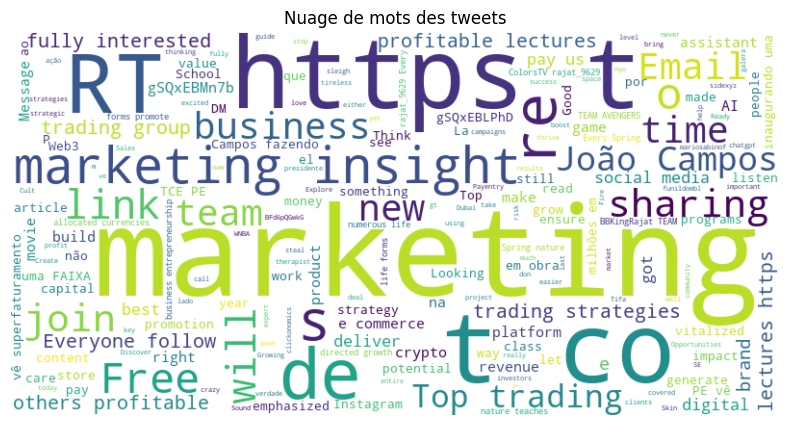

In [10]:
# Générer un nuage de mots à partir des tweets
all_text = " ".join(tweet for tweet in data['Texte'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des tweets")

# Enregistrer dans outputs
plt.savefig('../outputs/wordcloud_tweets.png')
plt.show()


**Interprétation**: Sans surprises, le mot "marketing" est celui qui ressort le plus. C'est normal car j'ai récupéré les tweets en lien avec le marketing. Nous avons aussi "http" qui ressort mais sachant qu'il s'agit de tweets,, c'est également assez normal. Mais c'est un mot qui nous apporte aucune informatiion sur les sentiments, Nous allons poursuiiivre le traiitement du texte

Nettoyage des tweets

In [8]:
# Rendre la détection reproductible
DetectorFactory.seed = 0

# Charger les stopwords anglais
stop_words_en = set(stopwords.words('english'))

# Fonction de nettoyage améliorée
def clean_tweet(tweet):
    try:
        # Étape 1 : Détection de la langue
        if detect(tweet) != 'en':  # Garder uniquement les tweets en anglais
            return None
        
        # Étape 2 : Nettoyage de base
        tweet = re.sub(r'@\w+', '', tweet)  # Enlever les mentions
        tweet = re.sub(r'http\S+', '', tweet)  # Enlever les liens
        tweet = re.sub(r'#\w+', '', tweet)  # Enlever les hashtags
        tweet = re.sub(r'[^\w\s]', '', tweet)  # Enlever les caractères spéciaux
        
        # Étape 3 : Mise en minuscules
        tweet = tweet.lower()
        
        
        # Étape 5 : Suppression des stopwords
        tweet = ' '.join(word for word in tweet.split() if word not in stop_words_en)
        
        return tweet
    except Exception as e:
        return None  # En cas de problème (ex : détection de langue)

# Appliquer le nettoyage
data['Cleaned_Text'] = data['Texte'].astype(str).apply(clean_tweet)

# Supprimer les lignes vides (Non-English ou problèmes de nettoyage)
data = data.dropna(subset=['Cleaned_Text'])

print(data[['Texte', 'Cleaned_Text']].head())


                                               Texte  \
0  @TheSavBananas @Vikings Imagine thinking you c...   
2  Discover how our expertise in marketing techno...   
3  "Think of each piece of content as a brushstro...   
4  By using reliable tools that provide clear ins...   
5  What's the best way to measure ROI in marketin...   

                                        Cleaned_Text  
0  imagine thinking created stunting team marketi...  
2  discover expertise marketing technology help b...  
3  think piece content brushstroke masterpiece di...  
4  using reliable tools provide clear insights ma...  
5               whats best way measure roi marketing  


In [10]:
# Créer un DataFrame sans la colonne Texte
data_clean = data.drop(columns=['Texte'])

print(f"Nouvelles dimensions des données : {data_clean.shape}")

Nouvelles dimensions des données : (78, 6)


Sauvegarde des données nettoyées

In [11]:
# Sauvegarder les données nettoyées dans un nouveau fichier
output_file = '../data/tweets_marketing_cleaned.csv'
data_clean.to_csv(output_file, index=False)
print(f"Données nettoyées sauvegardées dans : {output_file}")


Données nettoyées sauvegardées dans : ../data/tweets_marketing_cleaned.csv


In [ ]:
# # Sauvegarder les données nettoyées dans un nouveau fichier
# output_file = '../data/tweets_marketing_cleaned.csv'
# data_clean.to_csv(output_file, index=False)
# print(f"Données nettoyées sauvegardées dans : {output_file}")